# Give Me Some Credit

Importing libraries and data

In [2]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [36]:
#importing training data to pandas dataframe
df=pd.read_csv('cs-training.csv')
dftest=pd.read_csv('cs-test.csv')
#print(df)

dfy=df.iloc[:,1:2] #set the target column separate from dataframe
df=df.iloc[:,2:] #featuresx
dftest=dftest.iloc[:,2:]
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


Fill-in the missing values (nan) with the column means. (Use pd.fillna() or See Ch 4 of PML)

In [37]:
df.fillna(df.mean(),inplace=True)
dftest.fillna(df.mean(),inplace=True)

Standardizing the data.

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(df)
X_test_std = sc.transform(dftest)

y=dfy.iloc[:, 0].values

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)

In [62]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y)
#print('Training accuracy:', lr.score(X_train_std, y_train))
#print('Test accuracy:', lr.score(X_test_std, y_test))

np.set_printoptions(8)
print(lr.intercept_)
print(lr.coef_[lr.coef_!=0].shape)
print(lr.coef_)

[-2.85906743]
(10,)
[[-0.00906526 -0.41920392  2.10570255 -0.03898674 -0.45392778 -0.04060694
   1.94549091  0.07530596 -3.89236718  0.1012212 ]]


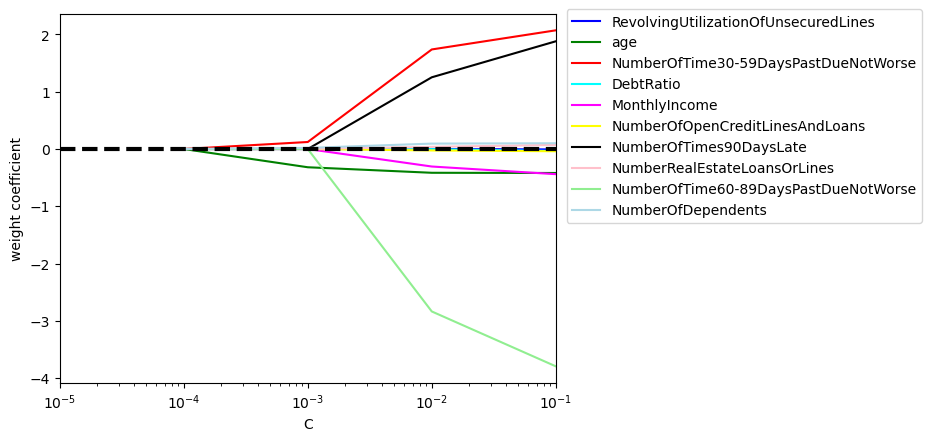

In [72]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

  
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 0.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y)
    weights.append(lr.coef_[0]) #change from 1 to 0
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column], #index error? prev(column+1) delete to be column
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**(-1)])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

In [70]:
weights

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00, -3.18620113e-01,  1.22405450e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.88145404e-02],
       [ 0.00000000e+00, -4.15110197e-01,  1.73805286e+00,
        -3.24940970e-03, -3.05714534e-01, -2.53466385e-02,
         1.25199089e+00,  3.71335719e-02, -2.83605768e+00,
         9.44155636e-02],
       [-7.18732084e-03, -4.18805374e-01,  2.07199356e+00,
        -3.46267507e-02, -4.39260889e-01, -3.92807100e-02,
         1.88034693e+00,  7.16332066e-02, -3.79398143e+00,
         1.00607210e-01],
       [-9.06527557e-03, -4.19203361e-01,  2.10571064e+00,
        -3.89867286e-02, -4.53928592e-01, -4.06082255e-02,
         1.94546016e+00,  7.53064350e-02, -3.89234463e+00,
         1.

In [65]:
y[1]

0